# Imports

In [1]:
import altair as alt
import pandas as pd
from vega_datasets import data

alt.renderers.enable('notebook')
%config InlineBackend.figure_format = 'retina'

# Encodings

In [2]:
cars = data.cars()
cars.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01  
3              amc rebel sst    USA           3433 1970-01-01  
4                ford torino    USA           3449 1970-01-01

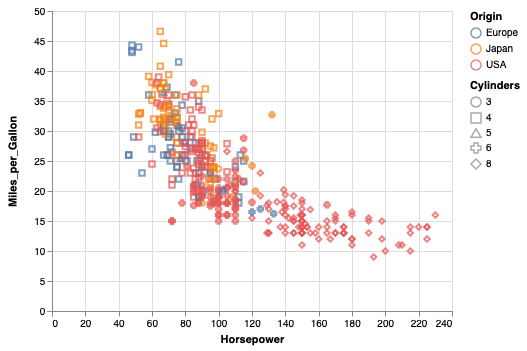

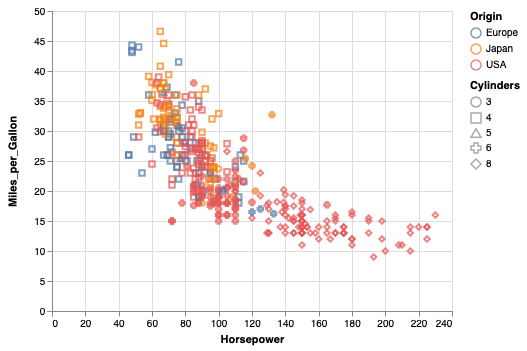

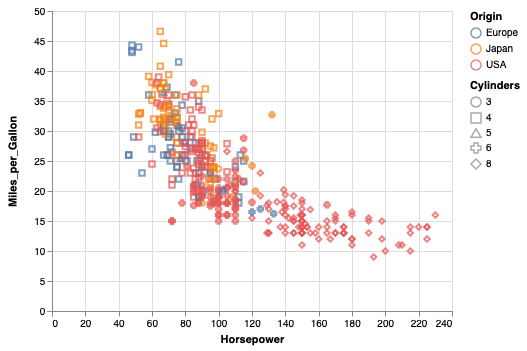

In [4]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    shape='Cylinders'
).interactive()

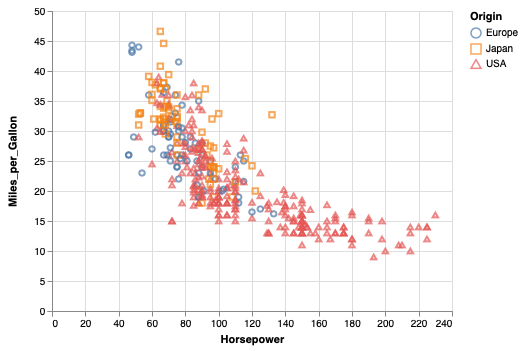

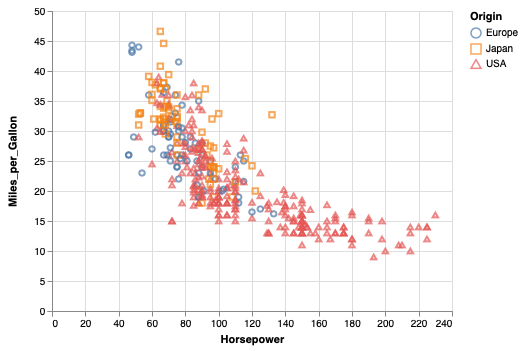

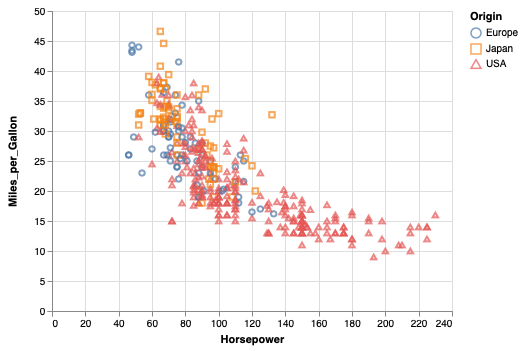

In [5]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N',
    shape='Origin:N'
).interactive()

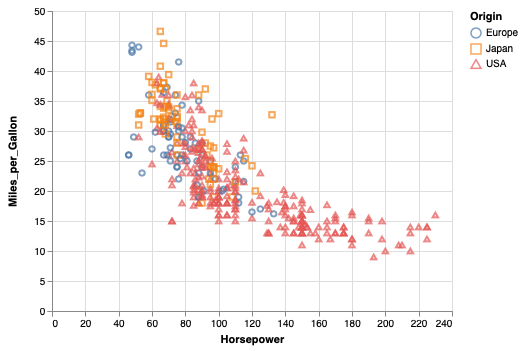

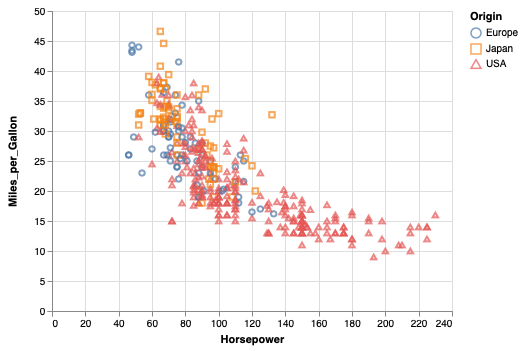

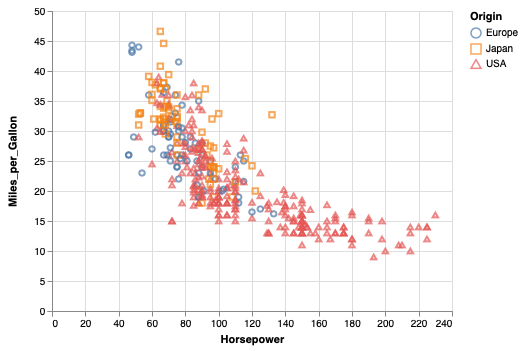

In [6]:
alt.Chart(cars).mark_point().encode(
    alt.X(field='Horsepower', type='quantitative'),
    alt.Y(field='Miles_per_Gallon', type='quantitative'),
    alt.Color(field='Origin', type='nominal'),
    alt.Shape(field='Origin', type='nominal')
).interactive()

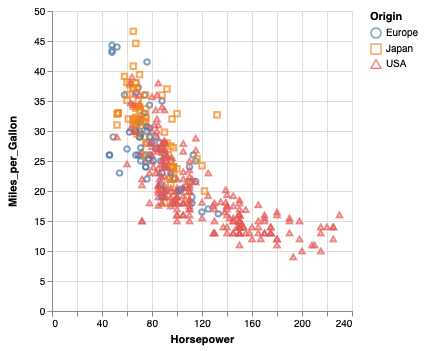

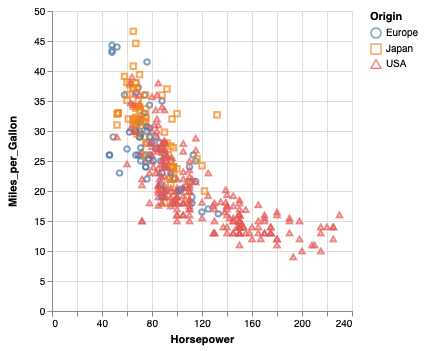

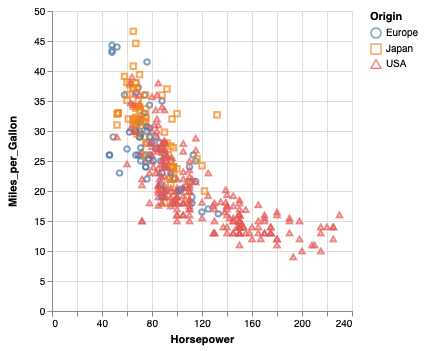

In [7]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    shape='Origin'
).properties(
    height=300,
    width=300
)

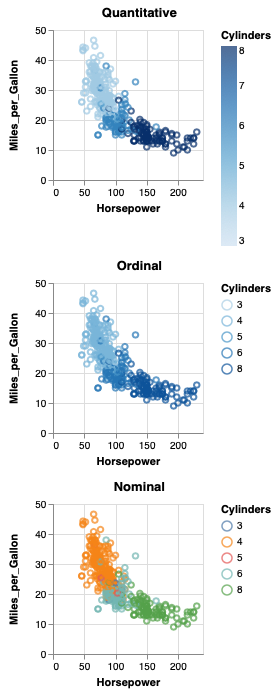

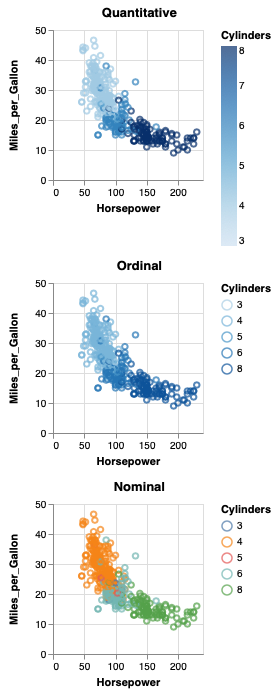

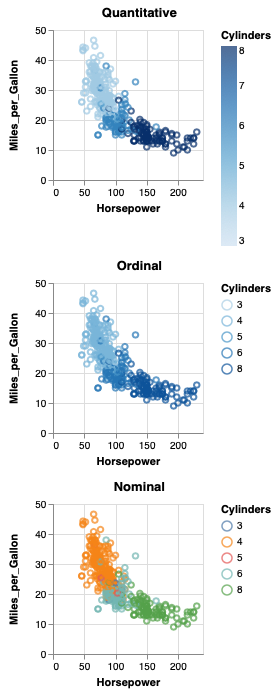

In [8]:
base = alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon'
).properties(
    height=150,
    width=150
)

alt.vconcat(
    base.encode(color='Cylinders:Q').properties(title='Quantitative'),
    base.encode(color='Cylinders:O').properties(title='Ordinal'),
    base.encode(color='Cylinders:N').properties(title='Nominal')
)

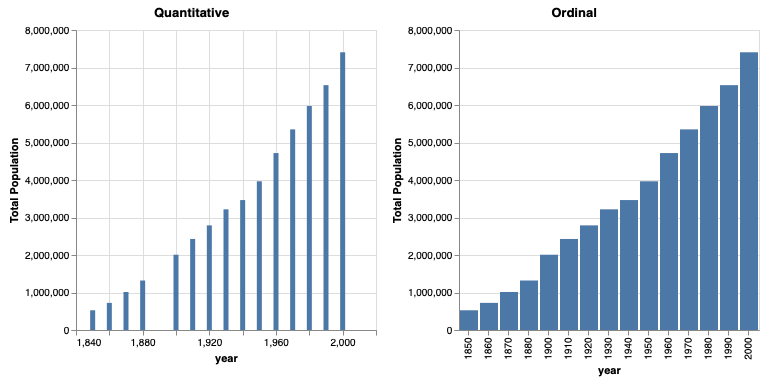

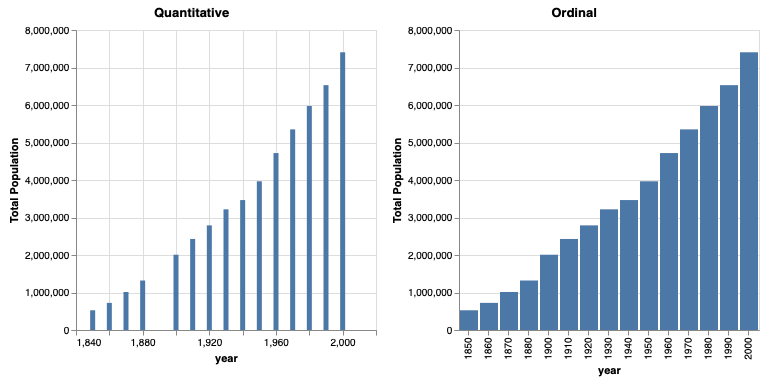

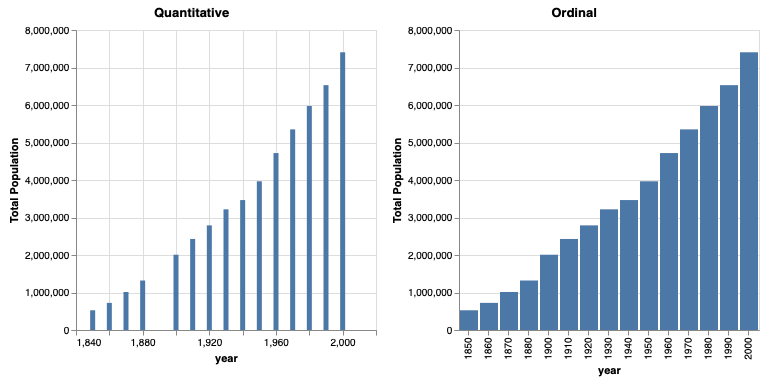

In [9]:
pop = data.population.url

base = alt.Chart(pop).mark_bar().encode(
    alt.Y('mean(people):Q', axis=alt.Axis(title='Total Population'))
).properties(
    height=300,
    width=300
).interactive()

alt.hconcat(
    base.encode(x='year:Q').properties(title='Quantitative'),
    base.encode(x='year:O').properties(title='Ordinal')
)

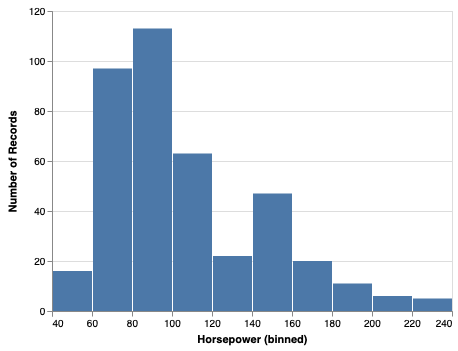

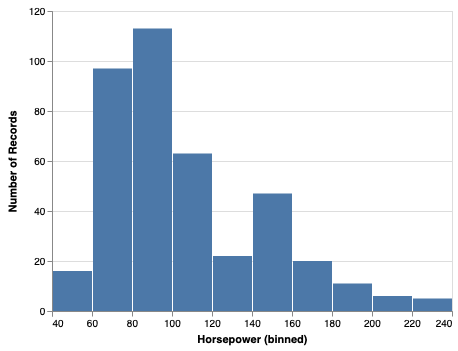

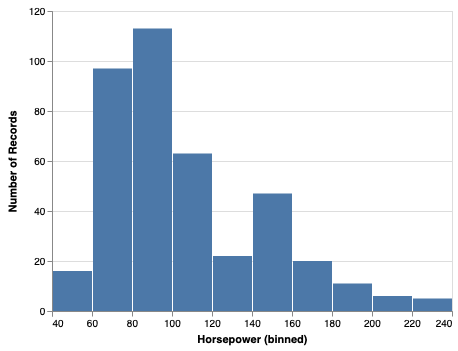

In [10]:
alt.Chart(cars).mark_bar().encode(
    alt.X('Horsepower', bin=True),
    y='count()'
)

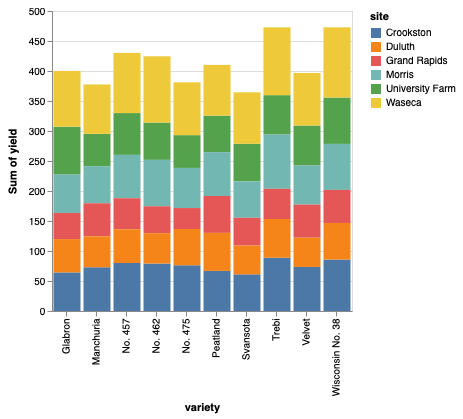

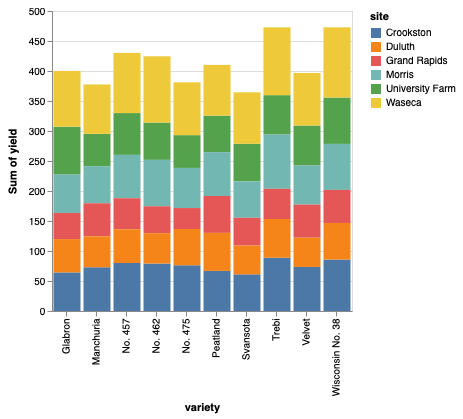

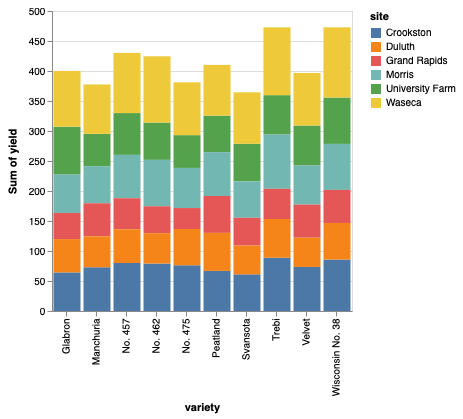

In [11]:
barley = data.barley()

alt.Chart(barley).mark_bar().encode(
    x='variety:N',
    y='sum(yield):Q',
    color='site:N',
    order=alt.Order('site:N', sort='ascending')
).properties(
    width=300
)

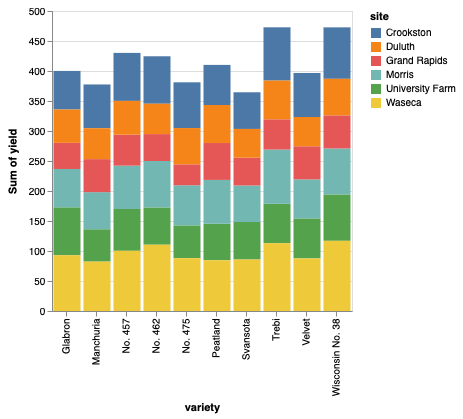

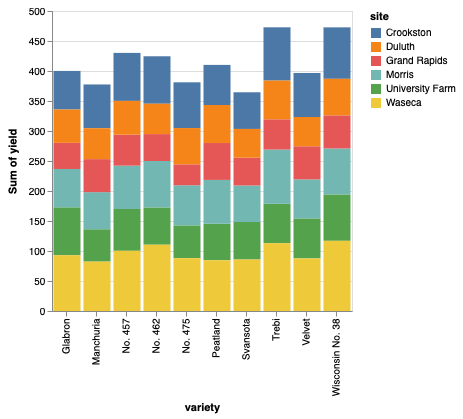

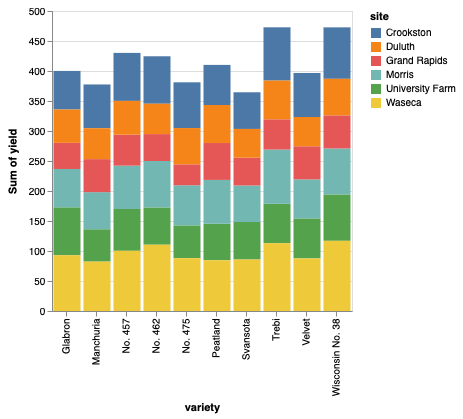

In [12]:
barley = data.barley()

alt.Chart(barley).mark_bar().encode(
    x='variety:N',
    y='sum(yield):Q',
    color='site:N',
    order=alt.Order('site:N', sort='descending')
).properties(
    width=300
)

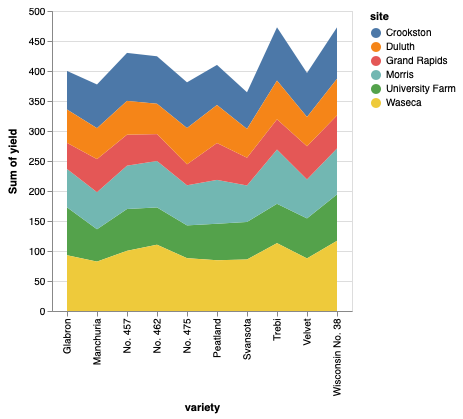

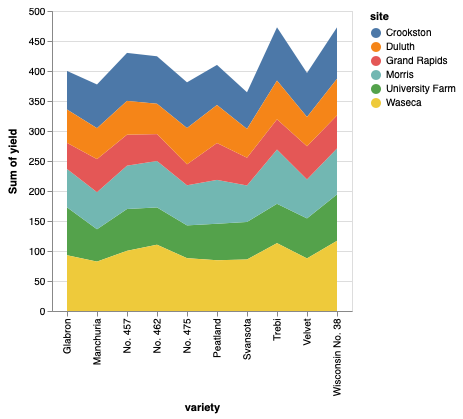

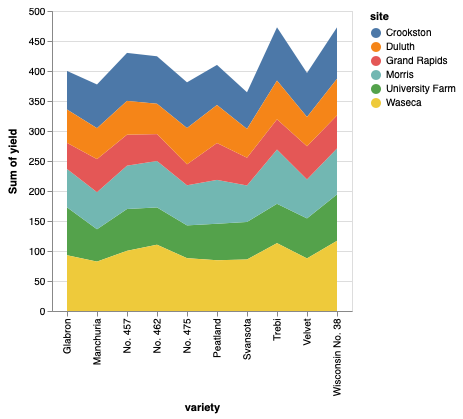

In [13]:
barley = data.barley()

alt.Chart(barley).mark_area().encode(
    x='variety:N',
    y='sum(yield):Q',
    color='site:N',
    order=alt.Order('site:N', sort='descending')
).properties(
    width=300
)

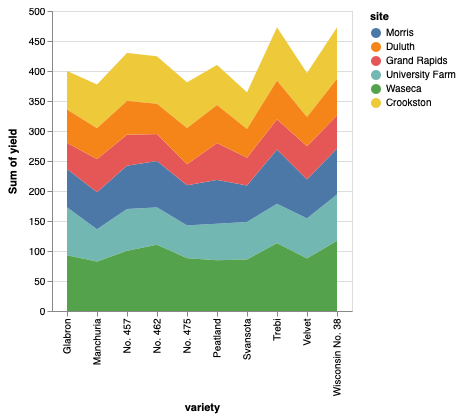

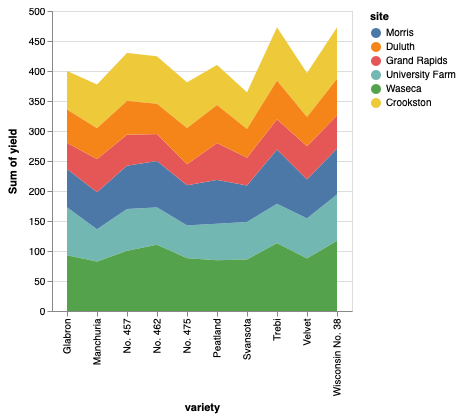

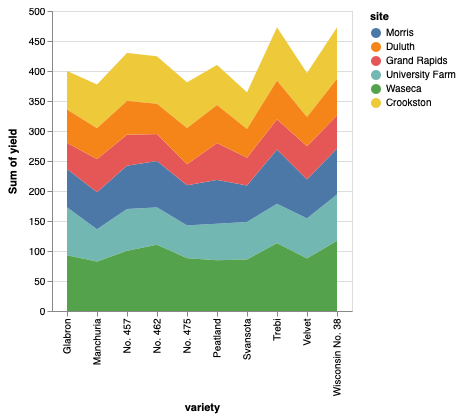

In [14]:
barley = data.barley()

alt.Chart(barley).mark_area().encode(
    alt.X('variety:N'),
    alt.Y('sum(yield):Q'),
    alt.Color('site:N',
        sort=['Morris', 'Duluth', 'Grand Rapids',
              'University Farm', 'Waseca', 'Crookston']
             )
).properties(
    width=300
)

# PYCON

In [2]:
cars = data.cars()
cars.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01  
3              amc rebel sst    USA           3433 1970-01-01  
4                ford torino    USA           3449 1970-01-01

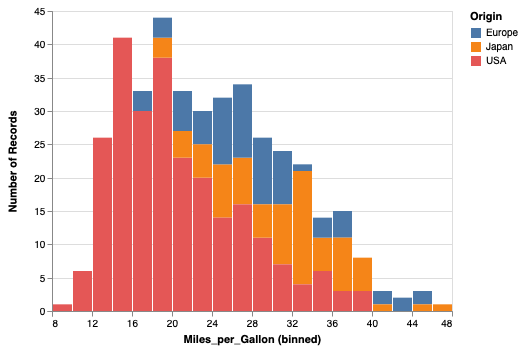

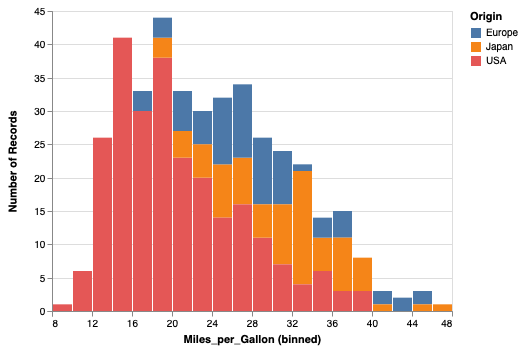

In [3]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Origin'
)

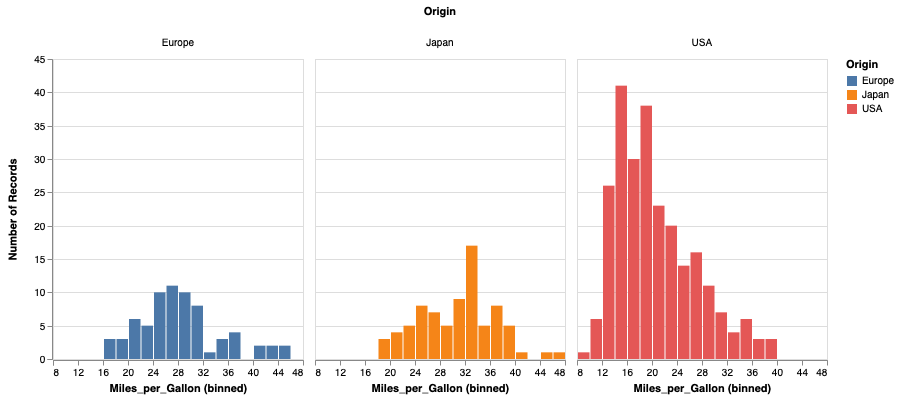

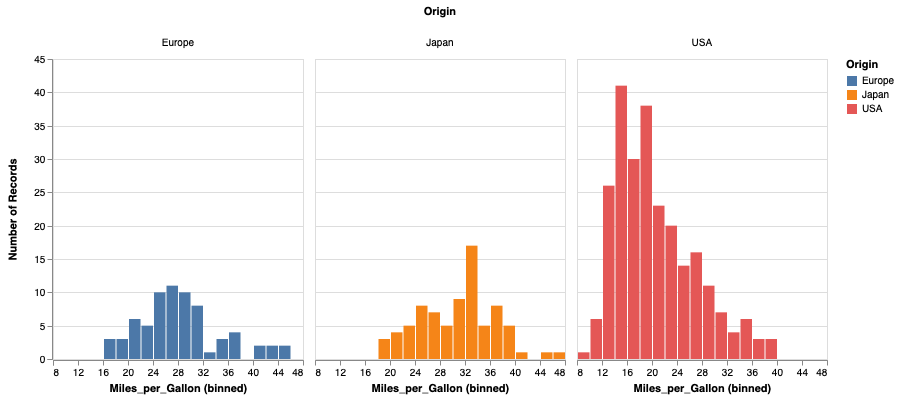

In [4]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Origin',
    column='Origin'
).properties(
    width=250
)

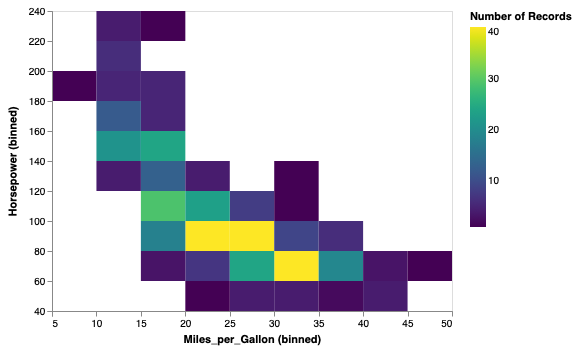

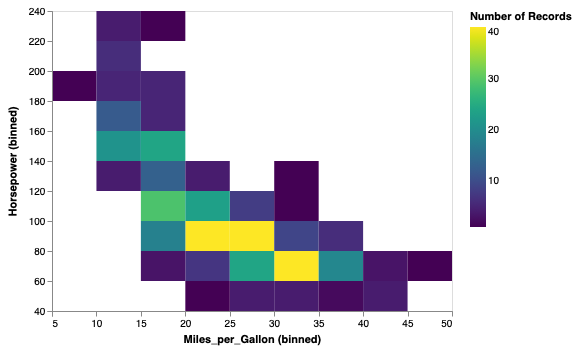

In [5]:
alt.Chart(cars).mark_rect().encode(
    x=alt.X('Miles_per_Gallon', bin=True),
    y=alt.Y('Horsepower', bin=True),
    color='count()'
)

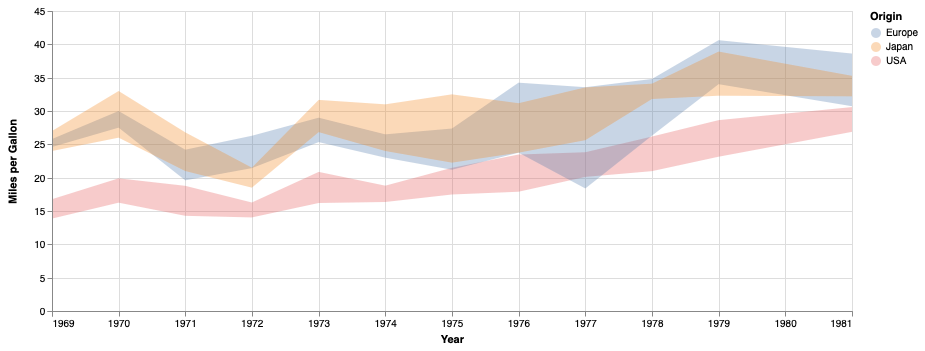

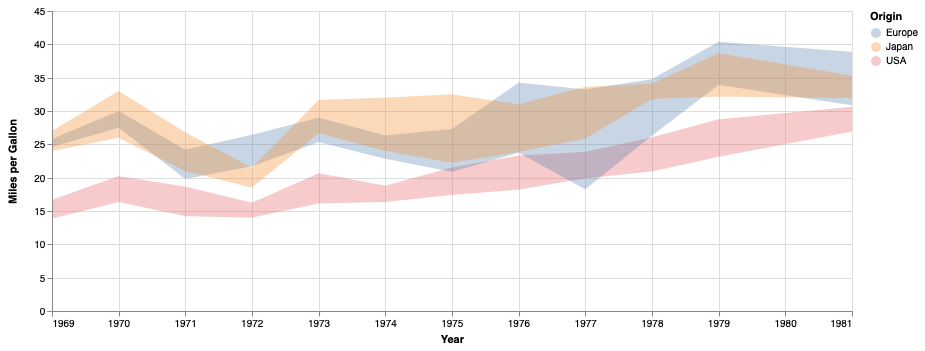

In [6]:
# Use confidence interval for the mean
alt.Chart(cars).mark_area(opacity=0.3).encode(
    x=alt.X('Year', timeUnit='year', title='Year'),
    y=alt.Y('ci0(Miles_per_Gallon)', axis=alt.Axis(title='Miles per Gallon')),
    y2='ci1(Miles_per_Gallon)',
    color='Origin'
).properties(
    width=800
)

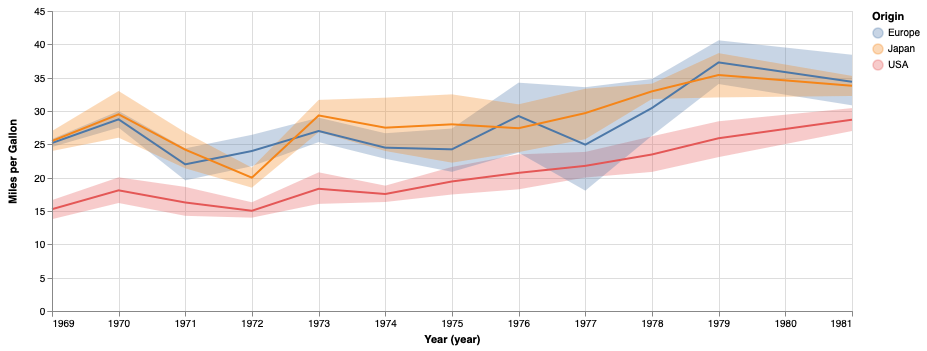

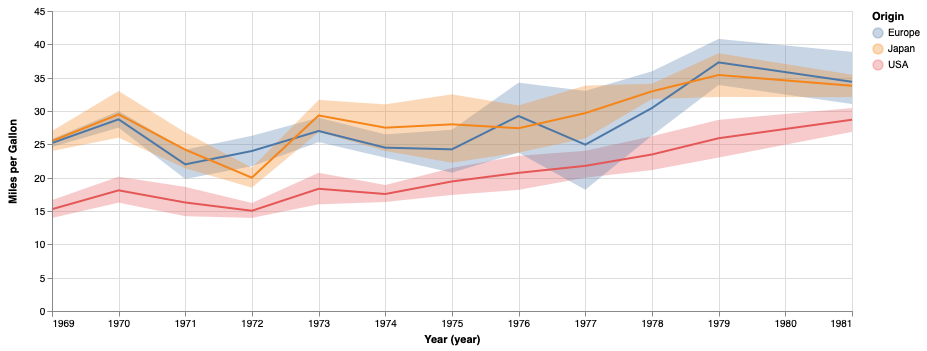

In [7]:
spread = alt.Chart(cars).mark_area(opacity=0.3).encode(
    x=alt.X('Year', timeUnit='year'),
    y=alt.Y('ci0(Miles_per_Gallon)', axis=alt.Axis(title='Miles per Gallon')),
    y2='ci1(Miles_per_Gallon)',
    color='Origin'
).properties(
    width=800
)

lines = alt.Chart(cars).mark_line().encode(
    x=alt.X('Year', timeUnit='year'),
    y='mean(Miles_per_Gallon)',
    color='Origin'
).properties(
    width=800
)

# Add lines to the CI chart
spread + lines

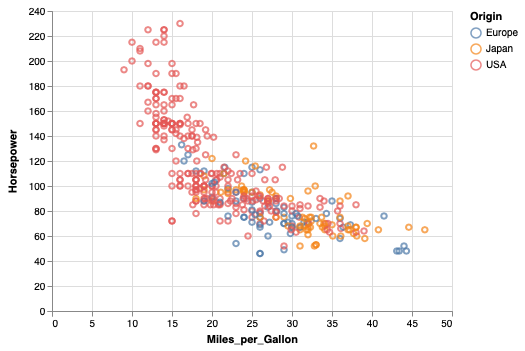

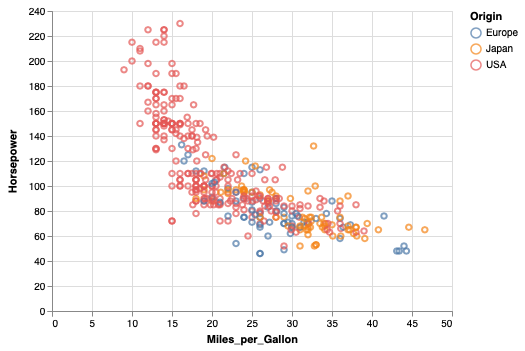

In [8]:
# Allows interactivity for the selected points
interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)

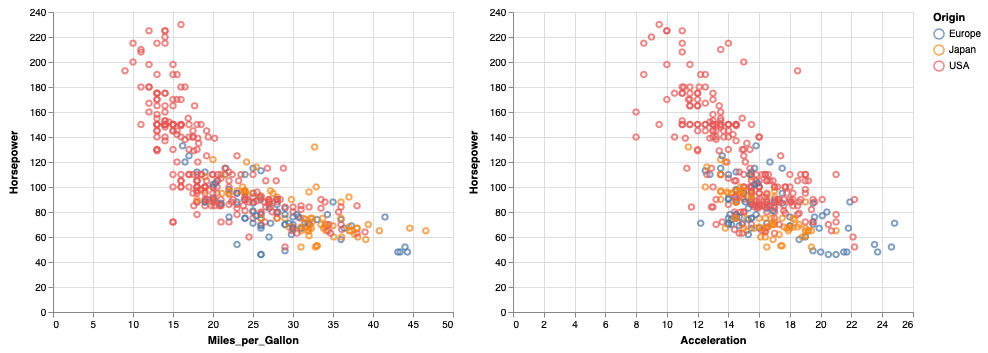

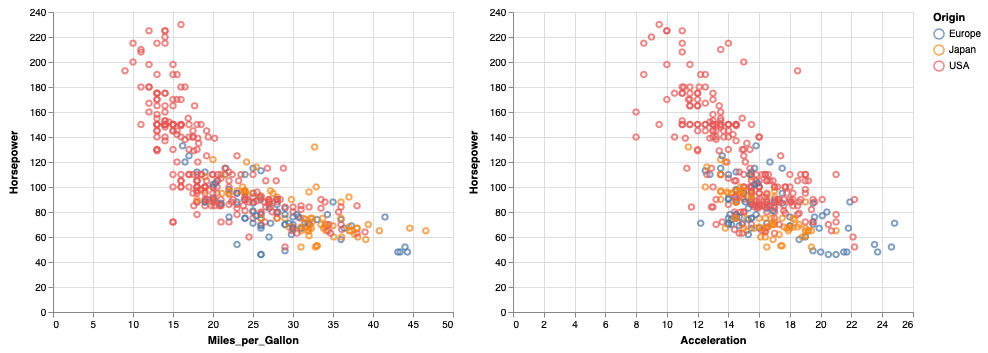

In [10]:
interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip='Name'
).properties(
    selection=interval
)

base.encode(x='Miles_per_Gallon') | base.encode(x='Acceleration')

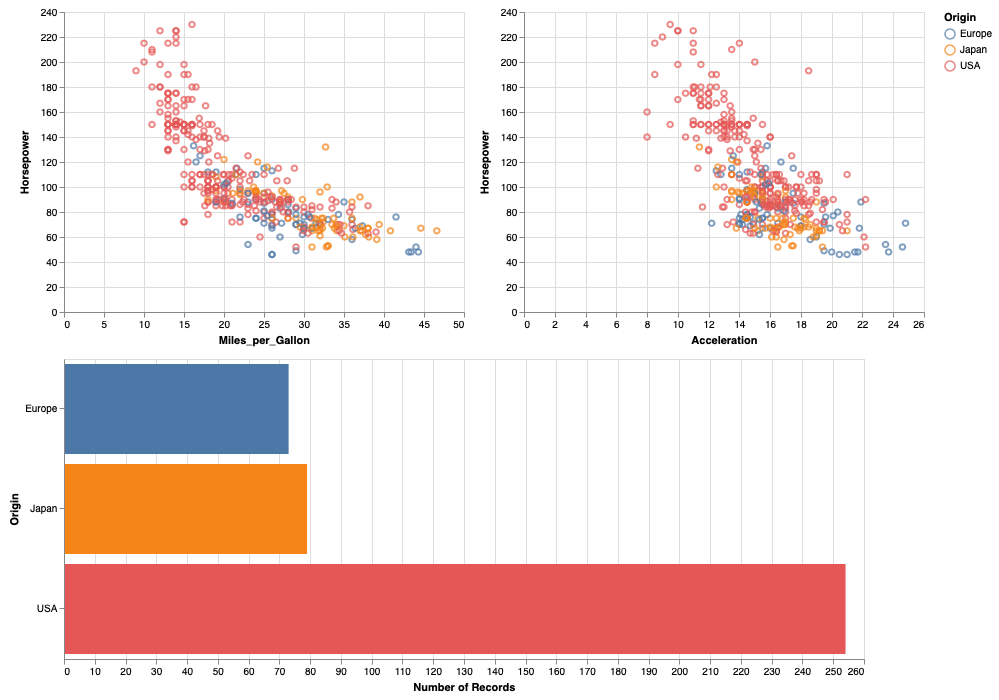

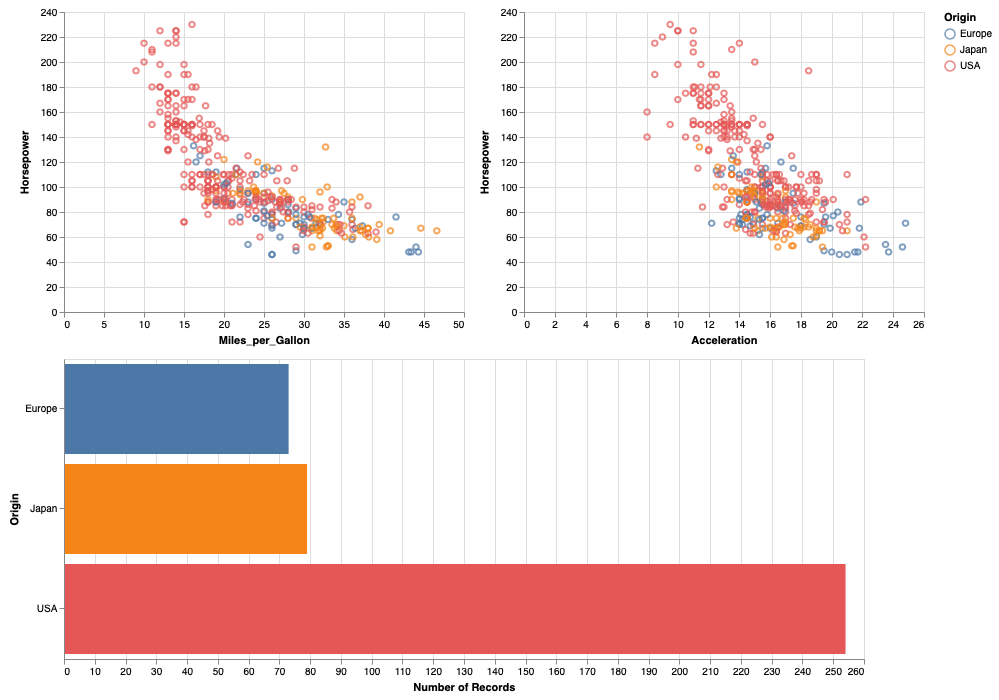

In [26]:
# Allows charts to filter other charts upon selection
interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip='Name'
).properties(
    selection=interval,
    width=400
)

hist = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin'
).properties(
    width=800,
    height=300
).transform_filter(
    interval
)

scatter = base.encode(x='Miles_per_Gallon') | base.encode(x='Acceleration')

scatter & hist

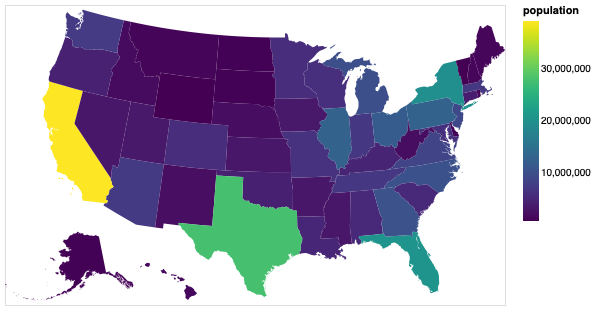

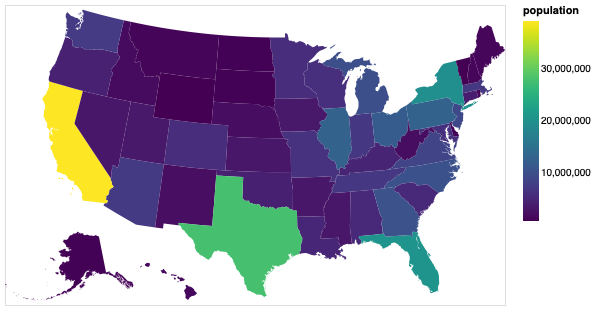

In [28]:
states = alt.topo_feature(data.us_10m.url, 'states')
pop = data.population_engineers_hurricanes()

variable_list = ['population', 'engineers', 'hurricanes']

alt.Chart(states).mark_geoshape().encode(
    color='population:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(pop, 'id', list(pop.columns))
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)